# Exercise 1
 Import the libraries that we'll use

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import expm
import pandas as pd
import time
from IPython.display import display, HTML, display_pretty, Image
import collections
#import warnings
#warnings.simplefilter("ignore")

# A flag to use timer, just to prevent your system to freeze while running heavy processes
useTimer = False #this feature is disabled

Add some functions to help us

In [2]:
# Calculate the n-th moment of a probability distribution
def nth_moment_of_probability_distribution(xList, pxList, n):
    return expected_value([x**n for x in xList], pxList)

# Calculate the expected value of a random variable
def expected_value(xList, pxList):
    return sum([xList[i]*pxList[i] for i in range(len(xList))])

# Calculate the shannon entropy of an array of probabilities
def shannon_entropy(pxList):
    H = 0
    for p in pxList:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

Create a class to encapsulate and do the graph operations

In [3]:
class Network:

    def __init__(self, name=None, graph=None):
        self.name = name
        self.graph = graph

    # Set graph
    def set_graph(self, graph):
        self.graph = graph

    # Read graph from file and apply transformations
    def read_graph(self, inputFile):
        # To read the network from a file, we use the command read_edgelist.
        G= nx.read_edgelist(inputFile, comments='%', nodetype=int, data=(('weight',float),))
        # We transfor the network into the undirected version.
        G = G.to_undirected()
        # Here we consider only the largest component.
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G=Gcc[0]
        # Sometimes the node labels are not in the sequential order or strings are used. To facilitate our implementation, let us convert the labels to integers starting with the index zero, because Python uses 0-based indexing.
        G = nx.convert_node_labels_to_integers(G, first_label=0)
        # Save graph to the network
        self.graph = G
        return self.graph

    # Calculate degree distribution
    def degree_distribution(self):
        vk = dict(self.graph.degree())
        vk = list(vk.values())  # we get only the degree values
        vk = np.array(vk)
        maxk = np.max(vk)
        mink = np.min(vk)
        kvalues= np.arange(0,maxk+1) # possible values of k
        Pk = np.zeros(maxk+1) # P(k)
        for k in vk:
            Pk[k] = Pk[k] + 1
        Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
        return (kvalues, Pk)

    # Plot degree distribution
    def plot_degree_distribution(self):
        degree_distribution = self.degree_distribution()
        fig = plt.subplot(1,1,1)
        fig.set_xscale('log')
        fig.set_yscale('log')
        plt.suptitle(self.name, fontsize=16)
        plt.plot(degree_distribution[0], degree_distribution[1],'bo')
        plt.xlabel("k", fontsize=20)
        plt.ylabel("P(k)", fontsize=20)
        plt.title('Degree distribution', fontsize=20)
        plt.show(block=True)
        plt.clf()

    # Calculate the nth moment of degree distribution
    def shannon_entropy_of_degree_distribution(self):
        kvalues, pk = self.degree_distribution()
        return shannon_entropy(pk)

    # Calculate the nth moment of degree distribution
    def nth_moment_of_degree_distribution(self, n):
        kvalues, pk = self.degree_distribution()
        return nth_moment_of_probability_distribution(kvalues, pk, n)

    # Plot the graph
    def plot_graph(self):
        plt.figure(figsize=(10,10))
        pos=nx.spring_layout(self.graph)
        nx.draw(self.graph, with_labels = True, pos = pos)
        plt.show(block=True)
        plt.clf()

    # Return the transitivity of the graph
    def transitivity(self):
        return nx.transitivity(self.graph)

    # Return the local clustering coefficient of each node of the graph
    def clustering(self):
        return nx.clustering(self.graph)

    # Return the average clustering coefficient of the graph
    def average_clustering(self):
        return nx.average_clustering(self.graph)

    # Return distance matrix
    def distance_matrix(self):
        return nx.floyd_warshall_numpy(self.graph, nodelist=sorted(self.graph.nodes()))

    # Get number of edges of the graph
    def number_of_edges(self):
        return self.graph.number_of_edges()

    # Get number of nodes of the graph
    def number_of_nodes(self):
        return len(self.graph)

    # Calculate average node degree
    def average_node_degree(self):
        # Get the degrees
        degrees = [d for n,d in self.graph.degree()]
        # Calculate the average
        return sum(degrees)/len(degrees)

    # Calculate average shortest path length
    def average_shortest_path_length(self):
        return nx.average_shortest_path_length(self.graph)

    # Calculate diameter
    def diameter(self):
        return nx.diameter(self.graph)

Now we'll calculate the measures for each network and print it.

In [4]:
def main():
    # Create a graph as specified in the exercise
    graph = nx.Graph()
    graph.add_edge(1,2,weight=1)
    graph.add_edge(1,4,weight=1)
    graph.add_edge(2,3,weight=1)
    graph.add_edge(2,4,weight=1)
    graph.add_edge(3,4,weight=1)
    graph.add_edge(3,5,weight=1)
    graph.add_edge(3,6,weight=1)
    graph.add_edge(3,7,weight=1)
    graph.add_edge(6,7,weight=1)
    # Load network
    network = Network(graph=graph)

    # Let us verify the number of nodes and edges of the network.
    print('Number of nodes:', network.number_of_nodes())
    print('Number of edges:', network.number_of_edges())

    # Calculate Average Clustering Cofficient
    degree_distribution = network.degree_distribution()
    print('Degree distribution:\nk:\t', degree_distribution[0], '\nP(k):\t', degree_distribution[1])

    # Calculate local clustering cofficient
    clustering_ord = collections.OrderedDict(sorted(network.clustering().items()))
    print('Local clustering coefficient:\ni:\t', list(clustering_ord.keys()), '\nCi:\t', list(clustering_ord.values()))

    # Calculate Average Clustering Cofficient
    print('Average clustering coefficient:', network.average_clustering())

    # Calculate Transitivity
    print('Transitivity:', network.transitivity())
    
    # Calculate distance matrix
    print('Distance matrix:\n', network.distance_matrix())

    # Calculate entropy
    print('Entropy:', network.shannon_entropy_of_degree_distribution())

    # Calculate the 2nd moment of degree distribution
    print('Second moment of degree distribution:', network.nth_moment_of_degree_distribution(2))

Here we create a process to run the main function. The advantage of using this strategy, instead of directly invoking main(), is that it gives us more control to stop the program.
 If we set the useTimer variable at the beginning of the program to True, the timer will stop the main process after 60 seconds. It's useful when we hit Ctrl+C in the terminal and the program refuses to stop.
 Also, it's important to catch the KeyboardInterrupt exception, that is raised when we hit Ctrl+C.
 By default, Ctrl+C would kill our program and the process that we've created would still continue to run.
 When we catch the exception, we also terminate the process of the function main. This way, Ctrl+C works again.

In [5]:
from multiprocessing import Process
from threading import Timer
if __name__ == "__main__":
    # Create the main process
    proc = Process(target=main)

    # Use timer if set
    if(useTimer):
        #declare timer, it gets the time in seconds
        timer = Timer(300, proc.terminate)
        timer.start()

    try:
        # Start process
        proc.start()

        # Block until process terminate
        proc.join()
    except KeyboardInterrupt:
        proc.terminate()

    # If process ends in time, cancel timer
    if(useTimer):
        timer.cancel()

Number of nodes: 7
Number of edges: 9
Degree distribution:
k:	 [0 1 2 3 4 5] 
P(k):	 [0.         0.14285714 0.42857143 0.28571429 0.         0.14285714]
Local clustering coefficient:
i:	 [1, 2, 3, 4, 5, 6, 7] 
Ci:	 [1.0, 0.6666666666666666, 0.2, 0.6666666666666666, 0, 1.0, 1.0]
Average clustering coefficient: 0.6476190476190476
Transitivity: 0.47368421052631576
Distance matrix:
 [[0. 1. 2. 1. 3. 3. 3.]
 [1. 0. 1. 1. 2. 2. 2.]
 [2. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 2. 2. 2.]
 [3. 2. 1. 2. 0. 2. 2.]
 [3. 2. 1. 2. 2. 0. 1.]
 [3. 2. 1. 2. 2. 1. 0.]]
Entropy: 1.8423709931771088
Second moment of degree distribution: 7.999999999999999


Above we can see the results of the computation. Now we have our manual resolution presented in the image below:

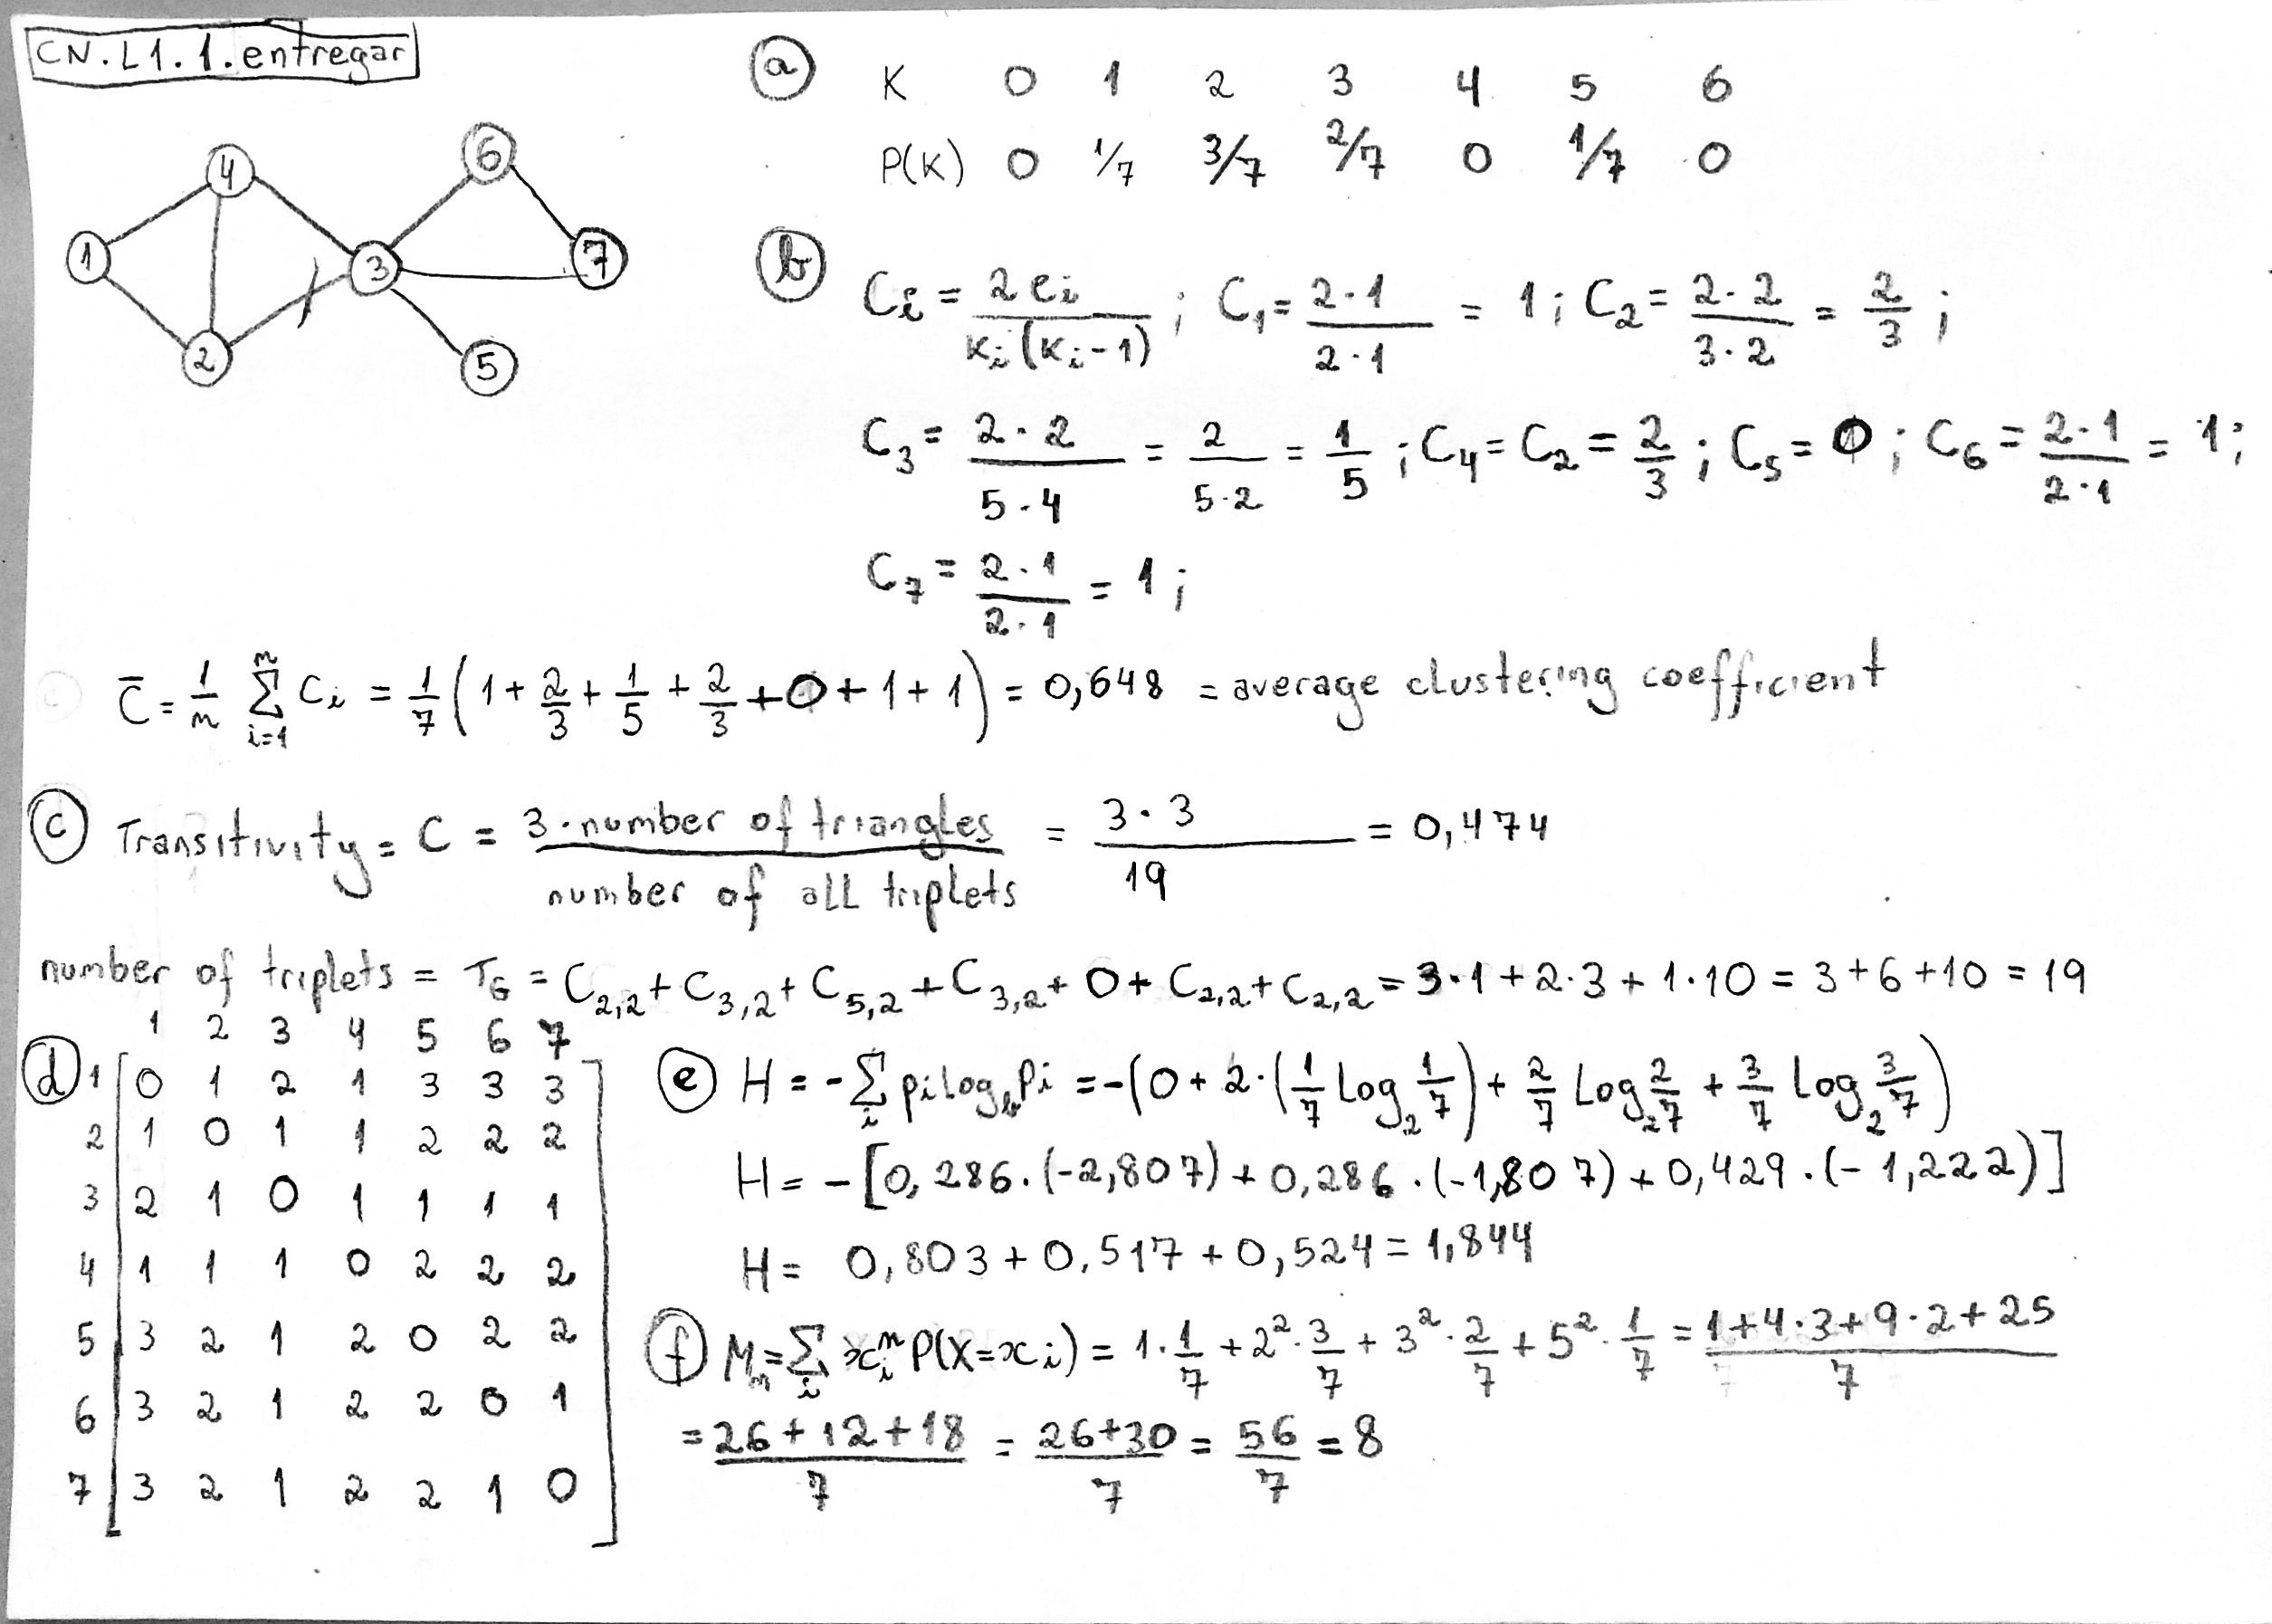

In [6]:
# Show the manual resolution
Image("ex1_resolution.jpg")

As we can see, the results are compatible.